In [45]:
#library untuk pengolahan data
import pandas as pd 
import numpy as np

#library untuk visualisasi data
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [46]:
#upload data dan set dataframe
df_transaction = pd.read_csv ('Transaction.csv', delimiter =';')
df_product = pd.read_csv ('Product.csv', delimiter =';')
df_store = pd.read_csv ('Store.csv', delimiter =';')
df_customer = pd.read_csv ('Customer.csv', delimiter =';')

In [47]:
#untuk mengetahui bentuk dataframe (basis, kolom)
df_transaction.shape, df_store.shape, df_store.shape, df_customer.shape

((5020, 8), (14, 6), (14, 6), (447, 5))

In [48]:
df_transaction.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,TR11369,328,01/01/2022,P3,7500,4,30000,12
1,TR16356,165,01/01/2022,P9,10000,7,70000,1
2,TR1984,183,01/01/2022,P1,8800,4,35200,4
3,TR35256,160,01/01/2022,P1,8800,7,61600,4
4,TR41231,386,01/01/2022,P9,10000,1,10000,4


In [49]:
df_store.head()

,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
0,1,Prima Tendean,Prima,Modern Trade,"-6,2","106,816666"
1,2,Prima Kelapa Dua,Prima,Modern Trade,"-6,914864","107,608238"
2,3,Prima Kota,Prima,Modern Trade,"-7,797068","110,370529"
3,4,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"
4,5,Bonafid,Gita,General Trade,"-7,250445","112,768845"


In [50]:
df_product.head()

,ProductID,Product Name,Price
0,P1,Choco Bar,8800
1,P2,Ginger Candy,3200
2,P3,Crackers,7500
3,P4,Potato Chip,12000
4,P5,Thai Tea,4200


In [51]:
df_customer.head()

,CustomerID,Age,Gender,Marital Status,Income
0,1,55,1,Married,"5,12"
1,2,60,1,Married,"6,23"
2,3,32,1,Married,"9,17"
3,4,31,1,Married,"4,87"
4,5,58,1,Married,"3,57"


In [52]:
#mendapatkan informasi data type
df_transaction.info()
df_store.info()
df_product.info()
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionID  5020 non-null   object
 1   CustomerID     5020 non-null   int64 
 2   Date           5020 non-null   object
 3   ProductID      5020 non-null   object
 4   Price          5020 non-null   int64 
 5   Qty            5020 non-null   int64 
 6   TotalAmount    5020 non-null   int64 
 7   StoreID        5020 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 313.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   StoreID     14 non-null     int64 
 1   StoreName   14 non-null     object
 2   GroupStore  14 non-null     object
 3   Type        14 non-null     object
 4   Latitude    14 non-null     object
 5   Longitude   14 non-null  

In [83]:
#data cleansing df transaction, kolom Date di ubah menjadi tipe data datetime menggunakan pd.to_datetime() 
df_transaction ['Date'] = pd.to_datetime(df_transaction ['Date'])

In [54]:
#data cleansing df customer, mengubah koma menjadi titik
df_customer ['Income'] = df_customer ['Income'].replace('[,]', '.', regex = True).astype('float')

In [55]:
#data cleansing df store, mengubah koma menjadi titik
df_store ['Latitude'] = df_store ['Latitude'].replace('[,]', '.', regex = True).astype('float')
df_store ['Longitude'] = df_store ['Longitude'].replace('[,]', '.', regex = True).astype('float')


In [56]:
#merge data transactiom dan customer didasarkan pada kolom customer id
df_merge = pd.merge (df_transaction, df_customer, on = ['CustomerID'])
#merge data hasil merge dengan product, menghilangkan kolom price biar tidak double
df_merge = pd.merge (df_merge, df_product.drop (columns=['Price']), on =['ProductID'])
#merge data hasil merge 2 dengan store didasarkan pada kolom store id
df_merge = pd.merge (df_merge, df_store, on = ['StoreID'])


In [57]:
df_merge

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,Product Name,StoreName,GroupStore,Type,Latitude,Longitude
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,36,0,Married,10.53,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
1,TR89318,183,2022-07-17,P3,7500,1,7500,12,27,1,Single,0.18,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
2,TR9106,123,2022-09-26,P3,7500,4,30000,12,34,0,Married,4.36,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
3,TR4331,335,2022-08-01,P3,7500,3,22500,12,29,1,Single,4.74,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
4,TR6445,181,2022-10-01,P3,7500,4,30000,12,33,1,Married,9.94,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5015,TR69555,221,2022-01-08,P4,12000,3,36000,4,23,1,Single,7.50,Potato Chip,Gita Ginara,Gita,General Trade,-6.966667,110.416664
5016,TR21587,425,2022-10-17,P4,12000,1,12000,4,58,1,Married,7.22,Potato Chip,Gita Ginara,Gita,General Trade,-6.966667,110.416664
5017,TR51183,409,2022-07-19,P4,12000,1,12000,4,47,0,Married,28.23,Potato Chip,Gita Ginara,Gita,General Trade,-6.966667,110.416664
5018,TR14963,374,2022-12-16,P4,12000,5,60000,4,32,0,Single,5.40,Potato Chip,Gita Ginara,Gita,General Trade,-6.966667,110.416664


In [58]:
#mengambil data yang penting
df_cluster = df_merge.groupby(['CustomerID']).agg({
    'TransactionID': 'count',
    'Qty': 'sum',
    'TotalAmount': 'sum'
}).reset_index()

In [59]:
df_cluster

,CustomerID,TransactionID,Qty,TotalAmount
0,1,17,60,623300
1,2,13,57,392300
2,3,15,56,446200
3,4,10,46,302500
4,5,7,27,268600
...,...,...,...,...
442,443,16,59,485100
443,444,18,62,577700
444,445,18,68,587200
445,446,11,42,423300


In [60]:
#drop data yang tidak diperlukan
data_cluster = df_cluster.drop(columns = 'CustomerID')
#normalisasi data
data_normalize = preprocessing.normalize(data_cluster)

In [61]:
data_normalize

array([[2.72741856e-05, 9.62618317e-05, 9.99999995e-01],
       [3.31379043e-05, 1.45296965e-04, 9.99999989e-01],
       [3.36172117e-05, 1.25504257e-04, 9.99999992e-01],
       ...,
       [3.06539507e-05, 1.15803814e-04, 9.99999993e-01],
       [2.59862980e-05, 9.92204105e-05, 9.99999995e-01],
       [2.95925334e-05, 9.56066465e-05, 9.99999995e-01]])

In [62]:
#algoritma K-Means dengan menggunakan metode "Elbow" dan metode "Silhouette Score"
K = range (2, 8)
fits = []
score = []

for k in K:
    model = KMeans (n_clusters = k, random_state = 0, n_init = 'auto').fit(data_normalize)
    
    fits.append(model)
    
    score.append(silhouette_score(data_normalize, model.labels_, metric = 'euclidean'))

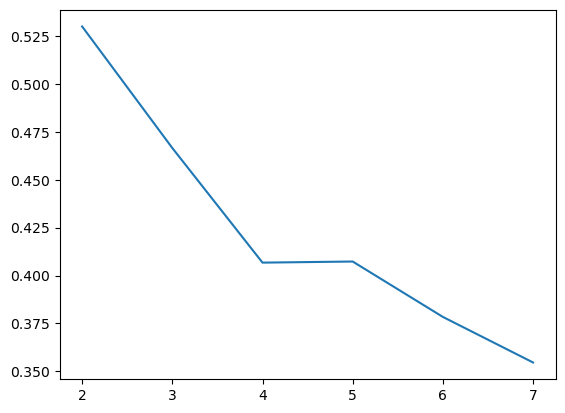

In [63]:
sns.lineplot(x = K, y = score);

In [64]:
#menambah kolom baru cluster model yang isinya fits dari hasil kmeans
df_cluster['cluster_label'] = fits[2].labels_

In [79]:
df_segmen = df_cluster.groupby (('cluster_label')).agg({
    'CustomerID' : 'count',
    'TransactionID' : 'mean',
    'Qty' : 'mean',
    'TotalAmount' : 'mean'

}).reset_index()

In [80]:
df_segmen

,cluster_label,CustomerID,TransactionID,Qty,TotalAmount
0,0,128,11.601562,40.007812,418542.187500
1,1,28,9.250000,35.142857,225110.714286
2,2,156,11.628205,42.775641,383731.410256
3,3,135,10.829630,40.874074,313365.925926


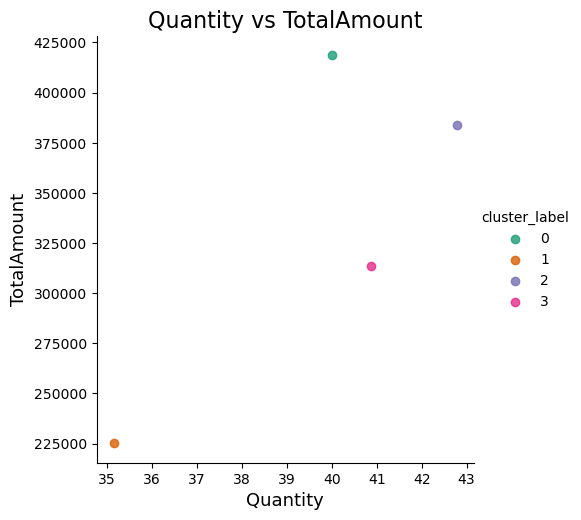

In [82]:
#grafik interpretasi data
sns.lmplot(x='Qty', y='TotalAmount', data=df_segmen, fit_reg=False, hue='cluster_label', height=5, palette='Dark2')
plt.title('Quantity vs TotalAmount', fontsize=16)
plt.xlabel('Quantity', fontsize=13)
plt.ylabel('TotalAmount', fontsize=13)
plt.show()